In [230]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Data and Correcting Data types

In [231]:
merged_optimized_data = pandas.read_csv("../processed_datasets/log_data_optimized_merged.csv")
merged_optimized_data = merged_optimized_data.drop(columns=['Unnamed: 0']) # Extra index column from import
merged_optimized_data = merged_optimized_data.drop(columns=['t']) #Drop t as it is too unique (each line has unique t)
merged_optimized_data[merged_optimized_data.columns[merged_optimized_data.isin([0, 1]).all()]] = merged_optimized_data[merged_optimized_data.columns[merged_optimized_data.isin([0, 1]).all()]].astype('bool') # Correct the data type of boolean columns
merged_optimized_data.head()

,planningTimeMicros,cpuNanos,filter,$eq,$gt,$in,$ne,$nin,$type,$mod,...,selector,standard_logical,all_operators,null_operand,regex_null_operand,text,query_length_raw,keywords_only,query_length_keywords_only,label
0,83.0,176371,"{'user': '{}', 'password': '{}'}",False,False,False,False,False,False,False,...,True,True,True,True,True,"{""user"": ""{}"", ""password"": ""{}""}",32,"{: {}, : {}}",12,False
1,83.0,176371,"{'user': '{}', 'password': '{}'}",False,False,False,False,False,False,False,...,True,True,True,True,True,"{""user"": ""{}"", ""password"": ""{}""}",32,"{: {}, : {}}",12,False
2,71.0,112781,{'username': {'$regex': '^{}'}},False,False,False,False,False,False,False,...,True,True,True,True,True,"{""username"": {""$regex"": ""^{}""}}",31,{: {$regex: ^{}}},17,True
3,71.0,112781,{'username': {'$regex': '^{}'}},False,False,False,False,False,False,False,...,True,True,True,True,True,"{""username"": {""$regex"": ""^{}""}}",31,{: {$regex: ^{}}},17,True
4,42.0,71093,{'username': {'$ne': '{}'}},False,False,False,True,False,False,False,...,True,True,True,True,True,"{""username"": {""$ne"": ""{}""}}",27,{: {$ne: {}}},13,True


In [232]:
merged_optimized_data.dtypes

planningTimeMicros            float64
cpuNanos                        int64
filter                         object
$eq                              bool
$gt                              bool
$in                              bool
$ne                              bool
$nin                             bool
$type                            bool
$mod                             bool
$regex                           bool
$where                           bool
$elemMatch                       bool
$size                            bool
$                                bool
>=                               bool
<=                               bool
<                                bool
>                                bool
selector_comparision             bool
selector_logical                 bool
selector_element                 bool
selector_evalutaion              bool
selector_array                   bool
selector_bitwise                 bool
projection                       bool
misc        

Create Samples based on target variable "Label"

In [233]:
sample_1 = merged_optimized_data[merged_optimized_data['label'] == 1]
sample_0 = merged_optimized_data[merged_optimized_data['label'] == 0]

In [234]:
# Categories of Columns
# Numerical
numerical_columns = merged_optimized_data.select_dtypes(include=['number']).columns.tolist()
# Boolean
boolean_columns = merged_optimized_data.select_dtypes(include=['bool']).columns.tolist()
x_boolean_columns = merged_optimized_data.select_dtypes(include=['bool']).columns.tolist()
x_boolean_columns.remove('label')
# Text
text_columns = merged_optimized_data.select_dtypes(include=['object']).columns.tolist()

print(f'{numerical_columns}\n{boolean_columns}\n{text_columns}')

['planningTimeMicros', 'cpuNanos', 'query_length_raw', 'query_length_keywords_only']
['$eq', '$gt', '$in', '$ne', '$nin', '$type', '$mod', '$regex', '$where', '$elemMatch', '$size', '$', '>=', '<=', '<', '>', 'selector_comparision', 'selector_logical', 'selector_element', 'selector_evalutaion', 'selector_array', 'selector_bitwise', 'projection', 'misc', 'selector', 'standard_logical', 'all_operators', 'null_operand', 'regex_null_operand', 'label']
['filter', 'text', 'keywords_only']


In [235]:
merged_optimized_data[boolean_columns]

,$eq,$gt,$in,$ne,$nin,$type,$mod,$regex,$where,$elemMatch,...,selector_array,selector_bitwise,projection,misc,selector,standard_logical,all_operators,null_operand,regex_null_operand,label
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
2,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,True,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,False,True,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
220,False,False,False,True,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
221,False,False,False,True,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
222,False,False,True,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False


Visualization & Analysis of Numerical Data

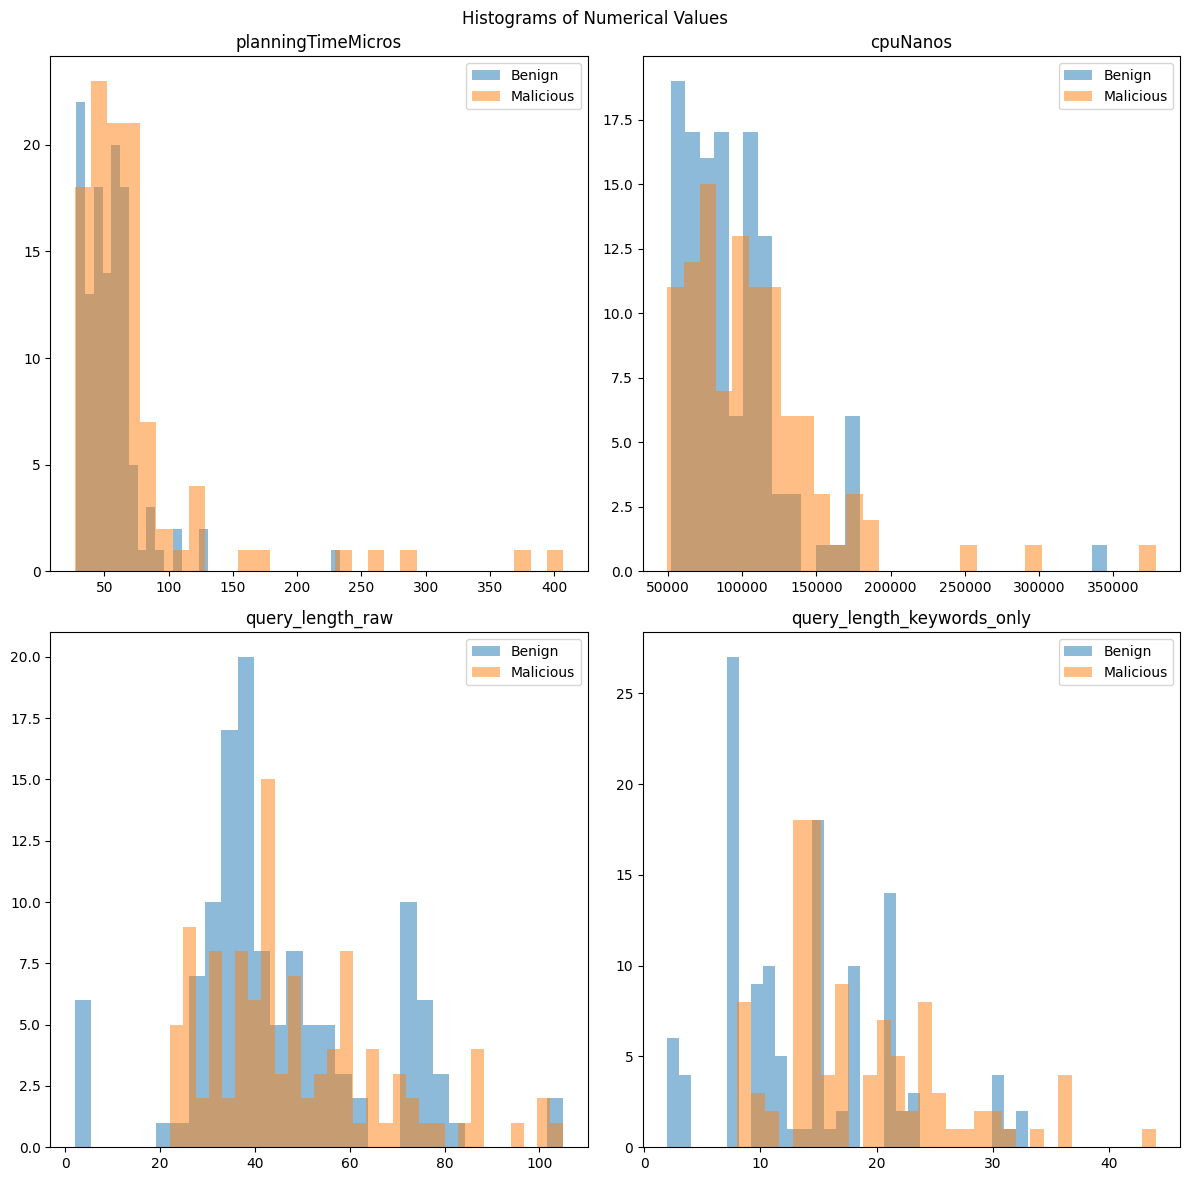

In [236]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

fig.suptitle("Histograms of Numerical Values")

for i, var in enumerate(numerical_columns):
    axs[i//2, i%2].hist(sample_0[var], bins=30, alpha=0.5, label='Benign')
    axs[i//2, i%2].hist(sample_1[var], bins=30, alpha=0.5, label='Malicious')
    axs[i//2, i%2].legend(loc='upper right')
    axs[i//2, i%2].set_title(var)

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

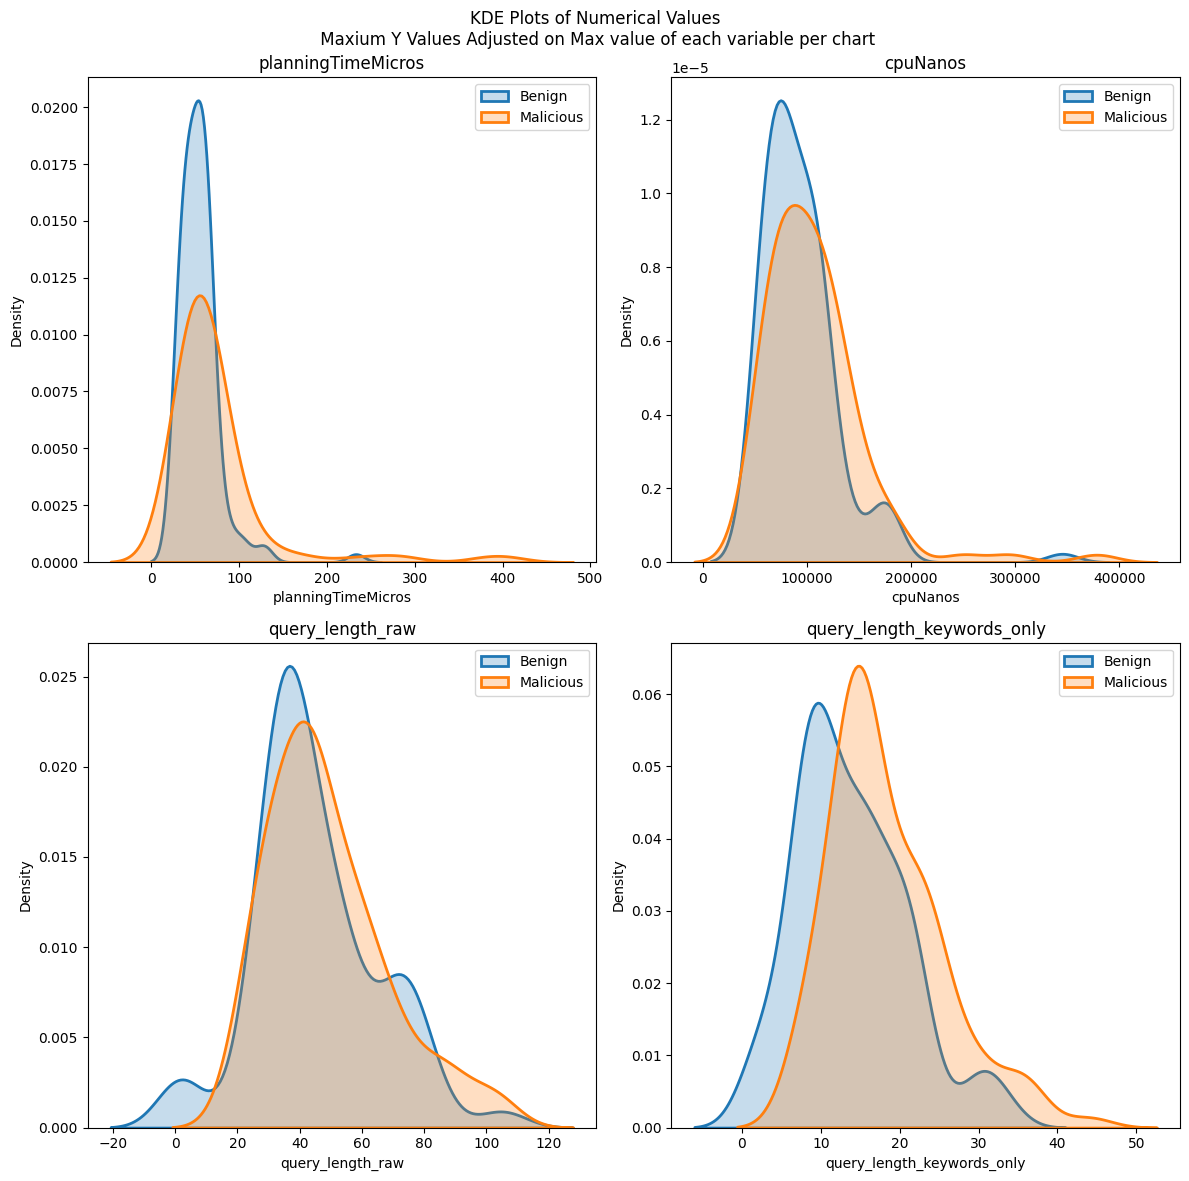

In [237]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

fig.suptitle("KDE Plots of Numerical Values\n Maxium Y Values Adjusted on Max value of each variable per chart")

for i, var in enumerate(numerical_columns):
    sns.kdeplot(sample_0[var], ax=axs[i//2, i%2], label='Benign', linewidth=2, fill=True)
    sns.kdeplot(sample_1[var], ax=axs[i//2, i%2], label='Malicious', linewidth=2, fill=True)
    axs[i//2, i%2].legend(loc='upper right')
    axs[i//2, i%2].set_title(var)

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

In [253]:
from scipy.stats import mannwhitneyu
import pandas as pd

stats = []
p_values = []
significant_0_1 = []
significant_0_05 = []
significant_0_01 = []

for col in numerical_columns:
    stat, p_value = mannwhitneyu(sample_0[col], sample_1[col])
    stats.append(stat)
    p_values.append(p_value)
    significant_0_1.append(p_value < 0.1)
    significant_0_05.append(p_value < 0.05)
    significant_0_01.append(p_value < 0.01)

mu_results = pd.DataFrame({
    'Column': numerical_columns,
    'Statistic': stats,
    'P-value': p_values,
    'Significant 0.1': significant_0_1,
    'Significant 0.05': significant_0_05,
    'Significant 0.01': significant_0_01
})

print("Mann-Whitney U test:")
mu_results

Mann-Whitney U test:


,Column,Statistic,P-value,Significant 0.1,Significant 0.05,Significant 0.01
0,planningTimeMicros,4926.5,0.006628,True,True,True
1,cpuNanos,5013.0,0.011228,True,True,False
2,query_length_raw,5589.0,0.178336,False,False,False
3,query_length_keywords_only,3997.0,0.000003,True,True,True


In [257]:
significant_numerical_columns = mu_results[mu_results['Significant 0.01'] == True]
significant_numerical_columns = significant_numerical_columns['Column'].tolist()
significant_numerical_columns

['planningTimeMicros', 'query_length_keywords_only']

Binary Data Analysis

In [245]:

from scipy.stats import chi2_contingency
import numpy as np

# Prepare a list to store results
phi_results = []
# Iterate over boolean columns
for col in x_boolean_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(merged_optimized_data[col], merged_optimized_data['label'])
    # Compute chi-square statistic, p-value, degrees of freedom, and expected frequencies
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    # Compute phi coefficient
    phi_coefficient = np.sqrt(chi2_stat / len(merged_optimized_data))
    # Append results to the list
    phi_results.append({'Column': col, 'Phi Coefficient': phi_coefficient, 'P-value': p_val, 'Significant 0.1': p_val < 0.1, 'Significant 0.05': p_val < 0.05, 'Significant 0.01': p_val < 0.01})

# Convert the list to a DataFrame
phi_results_df = pd.DataFrame(phi_results)
phi_results_df

,Column,Phi Coefficient,P-value,Significant 0.1,Significant 0.05,Significant 0.01
0,$eq,0.086135,0.197345,False,False,False
1,$gt,0.055968,0.402223,False,False,False
2,$in,0.070561,0.290941,False,False,False
3,$ne,0.172719,0.009737,True,True,True
4,$nin,0.004795,0.942783,False,False,False
5,$type,0.095043,0.154889,False,False,False
6,$mod,0.004795,0.942783,False,False,False
7,$regex,0.080065,0.230798,False,False,False
8,$where,0.111045,0.096519,True,False,False
9,$elemMatch,0.111045,0.096519,True,False,False


In [256]:
significant_boolean_columns = phi_results_df[phi_results_df['Significant 0.01'] == True]
significant_boolean_columns = significant_boolean_columns['Column'].tolist()
significant_boolean_columns

['$ne', '$']

In [260]:
# Combine the two lists and remove duplicates by converting them to sets
significant_columns = list(set(significant_numerical_columns) | set(significant_boolean_columns))
significant_columns

['planningTimeMicros', '$', '$ne', 'query_length_keywords_only']

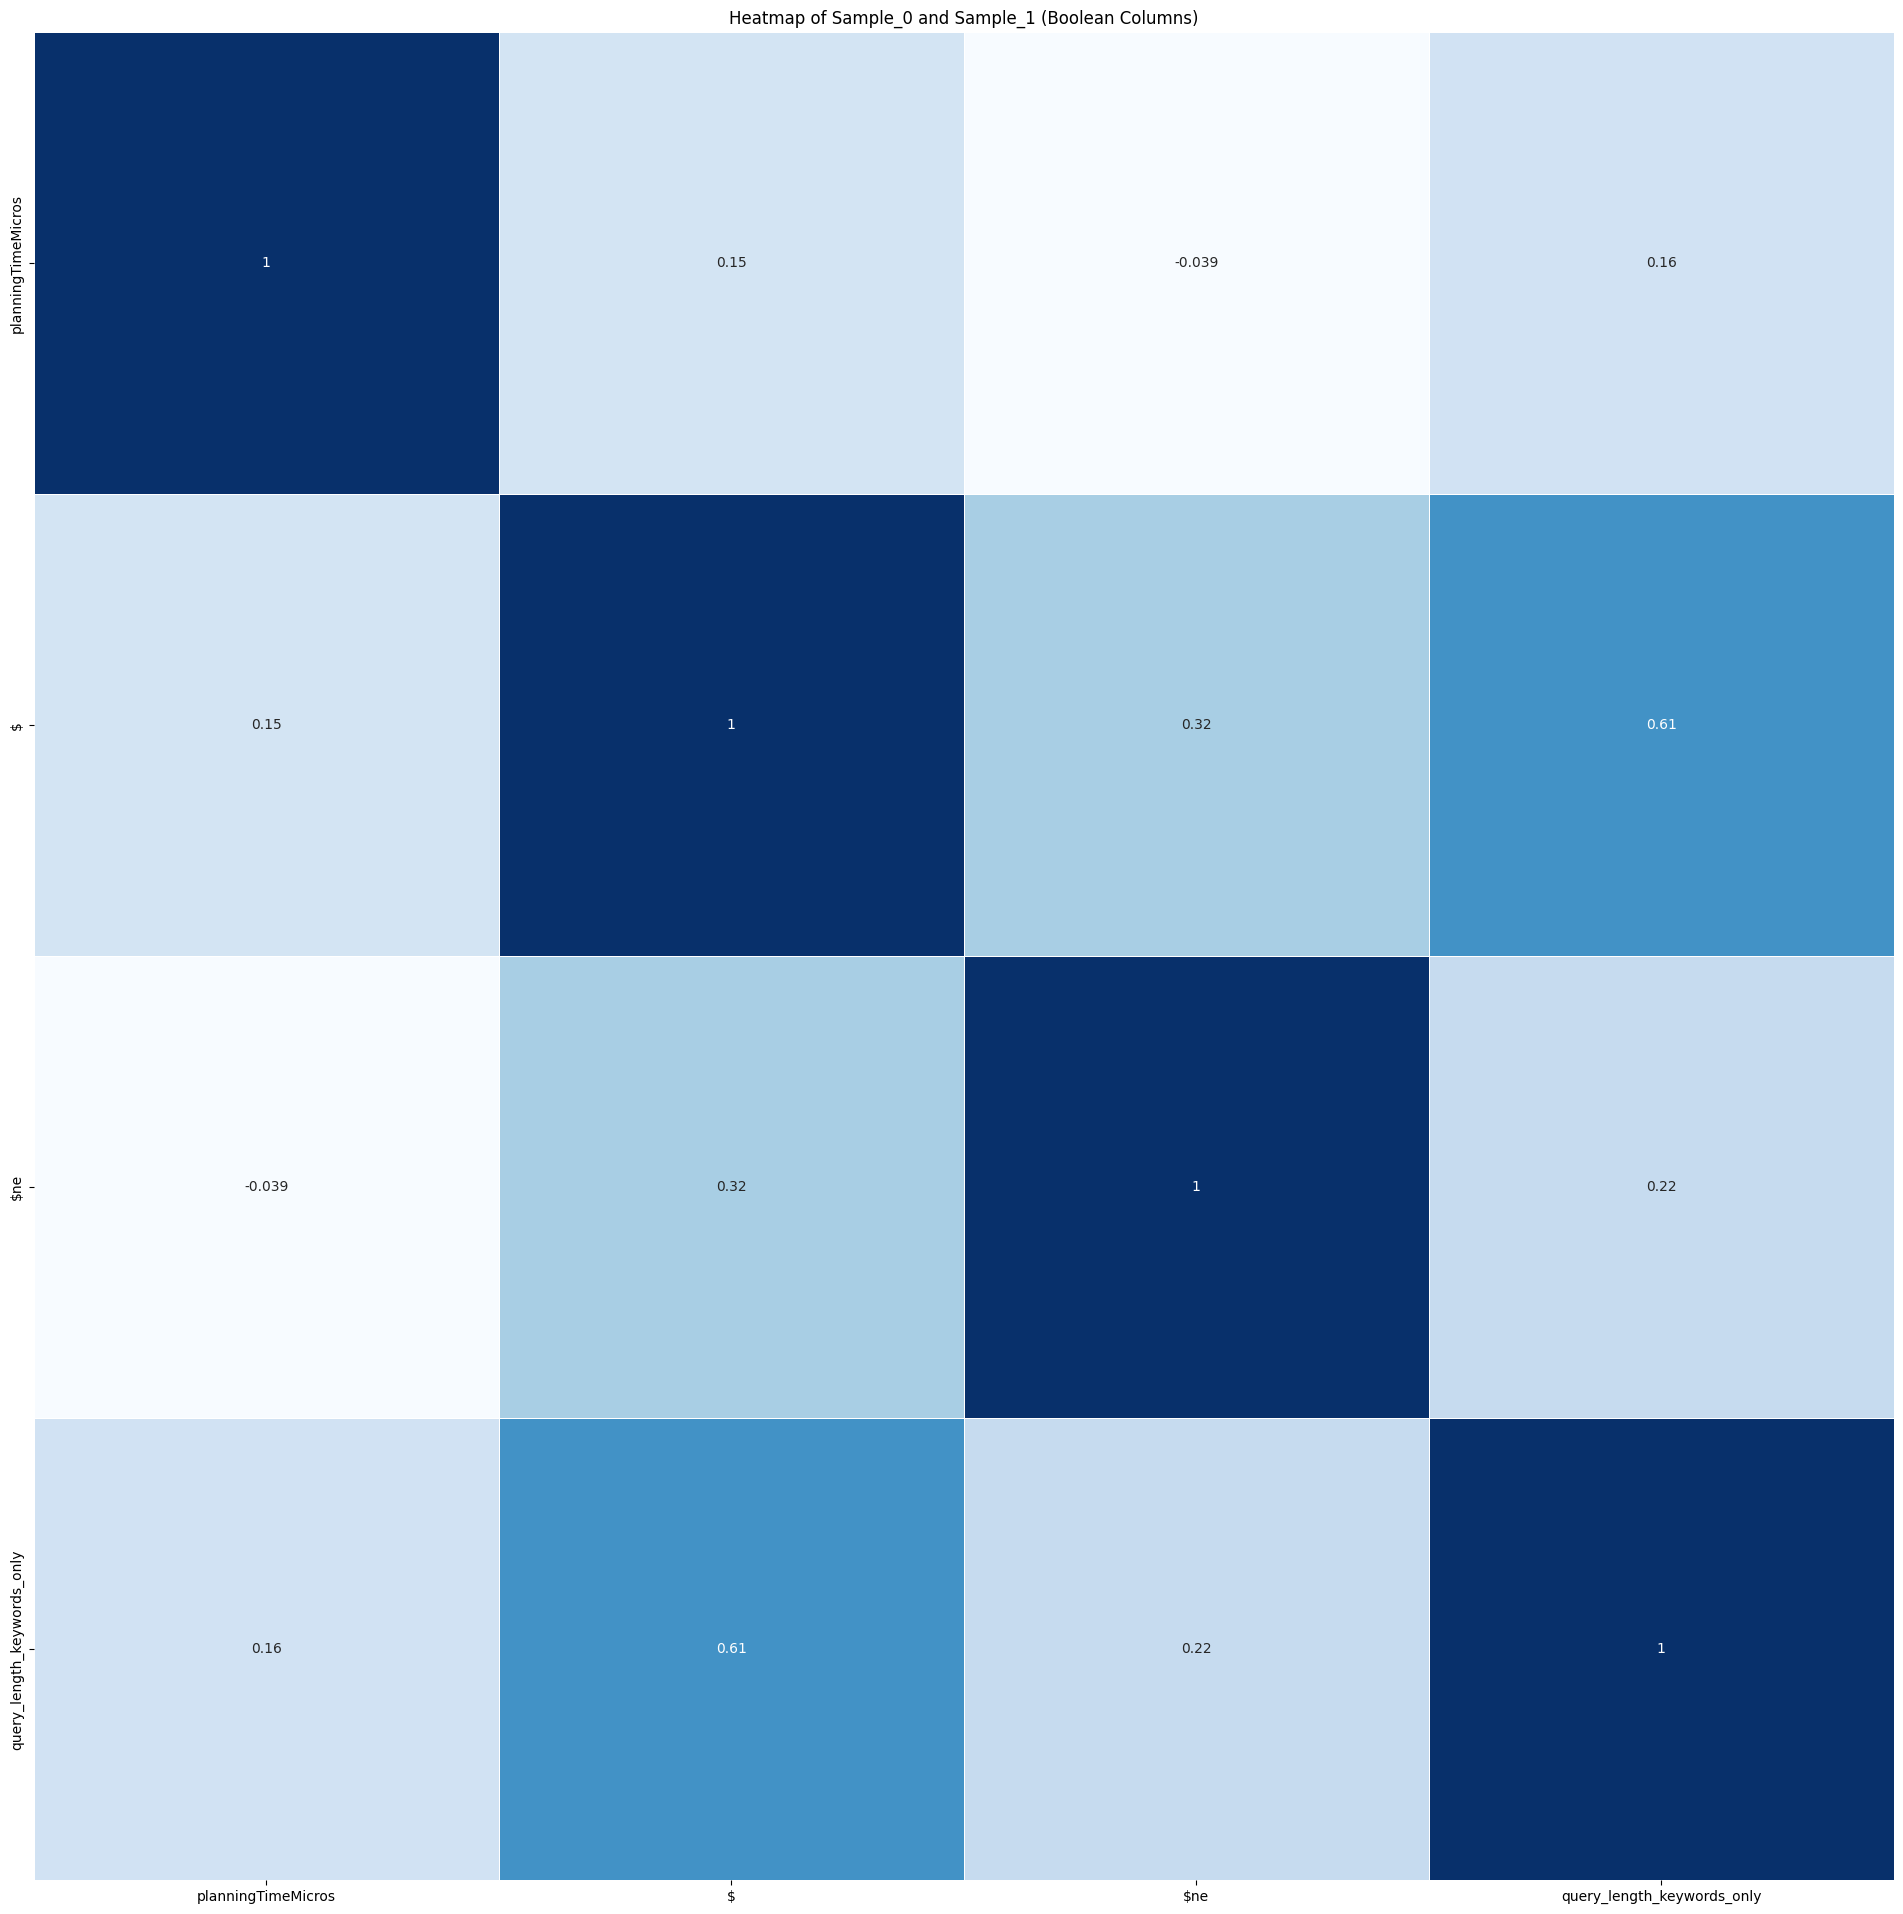

In [261]:
plt.figure(figsize=(24, 24))  # Set figure size
sns.heatmap(merged_optimized_data[significant_columns].corr(), cmap='Blues', annot=True, cbar=False, linewidths=0.5)
plt.title('Heatmap of Sample_0 and Sample_1 (Boolean Columns)')
plt.show()